# Project: Titanic Competition
Author: Kevin (Zhongkai) Xue

Here is the **catalog** for the project:
1. 
2. 

## 1. Data Preview

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

Here is an overall skim of the dataset.

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Here we check the information of the data.

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


From above, we know there exists vacant value in `Age`, `Cabin`, `Embarked` and `Fare`.

As the result is to predict the case of survival, we plot the ratio of survival.

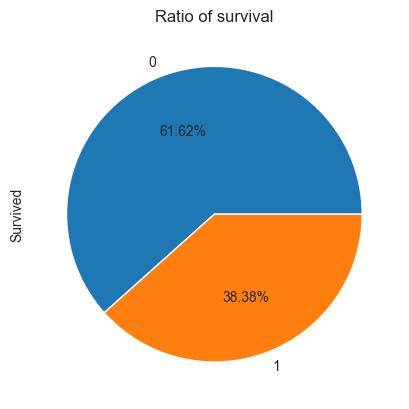

In [25]:
plot = train_data['Survived'].value_counts().plot.pie(autopct = "%1.2f%%")
plot.set_title('Ratio of survival')

plt.show()

## 2. Methods for vacant value

Before the analysis, we need to pay attention to the vacant value.

Some ML methods like *RNN* could handle vacant value well, while some cannot. For vacant value, we have methods like:
+ For an enormous dataset with few vant values, delete them instantly.
+ For attributes that might not be that vital, assign it with the average or mode.
+ For standard attributes, assign it with a specific sign like `U0`, for the vacancy could be a kind of information.
+ For vital attributes, use regression model like *Linear R egression* or *Random Forest* to predict.

For the attribute `Embarked`, which have three locations, we assign the two vacant values with **mode**.

In [7]:
train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values

For the attribute `Cabin`, the vacancy could be explained as "no cabins", thus we assign it with `U0`.

In [8]:
train_data['Cabin'] = train_data.Cabin.fillna('U0') 
#train_data.Cabin[train_data.Cabin.isnull()]='U0'

For the attribute `Age`, we should predict the vacancy more precisely.

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Choose numerical attributes in the model for the sklearn training.
age_df = train_data[['Age', 'Survived', 'Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[train_data['Age'].notnull()]
age_df_isnull = age_df.loc[train_data['Age'].isnull()]
X = age_df_notnull.values[:, 1:]
y = age_df_notnull.values[:, 0]

# Use RFR to train the datasets.
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X, y)
predictAges = RFR.predict(age_df_isnull.values[:, 1:]) 
train_data.loc[train_data['Age'].isnull(), ['Age']] = predictAges

After adequate fulfillment, we check the information again.

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. Analyze data interaction

### (1) Sex and Survival

In [11]:
train_data.groupby(['Pclass', 'Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

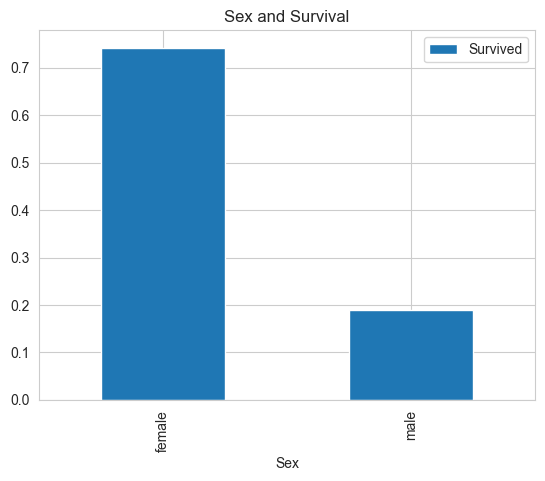

In [24]:
plot = train_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()
plot.set_title('Sex and Survival')

plt.show()

Actually, "ladies first" is well presented in the accident.

### (2) Pclass and Survival

In [13]:
train_data.groupby(['Pclass', 'Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

We analyse the survival of males and females in each PClass.

In [14]:
train_data.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

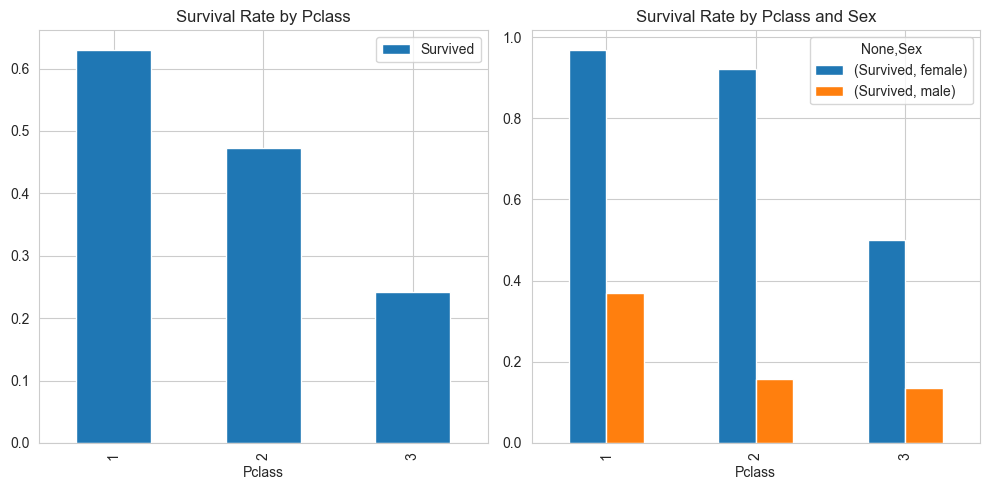

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

# Plot the bar chart for passengers in different Pclass.
ax1 = train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot(kind='bar', ax=axes[0])
ax1.set_title('Survival Rate by Pclass')  

# Plot the bar chart for passengers in different Pclass and Sexes.
ax2 = train_data[['Sex', 'Pclass', 'Survived']].groupby(['Pclass', 'Sex']).mean().unstack().plot(kind='bar', ax=axes[1])
ax2.set_title('Survival Rate by Pclass and Sex')  

plt.tight_layout()  
plt.show() 

In the whole, "ladies first" is well preserved in the accident, but different in specific PClass.

### (3) Age and Survival

We analyze the relation betwwe age and survival in different PClasses and Sexes.

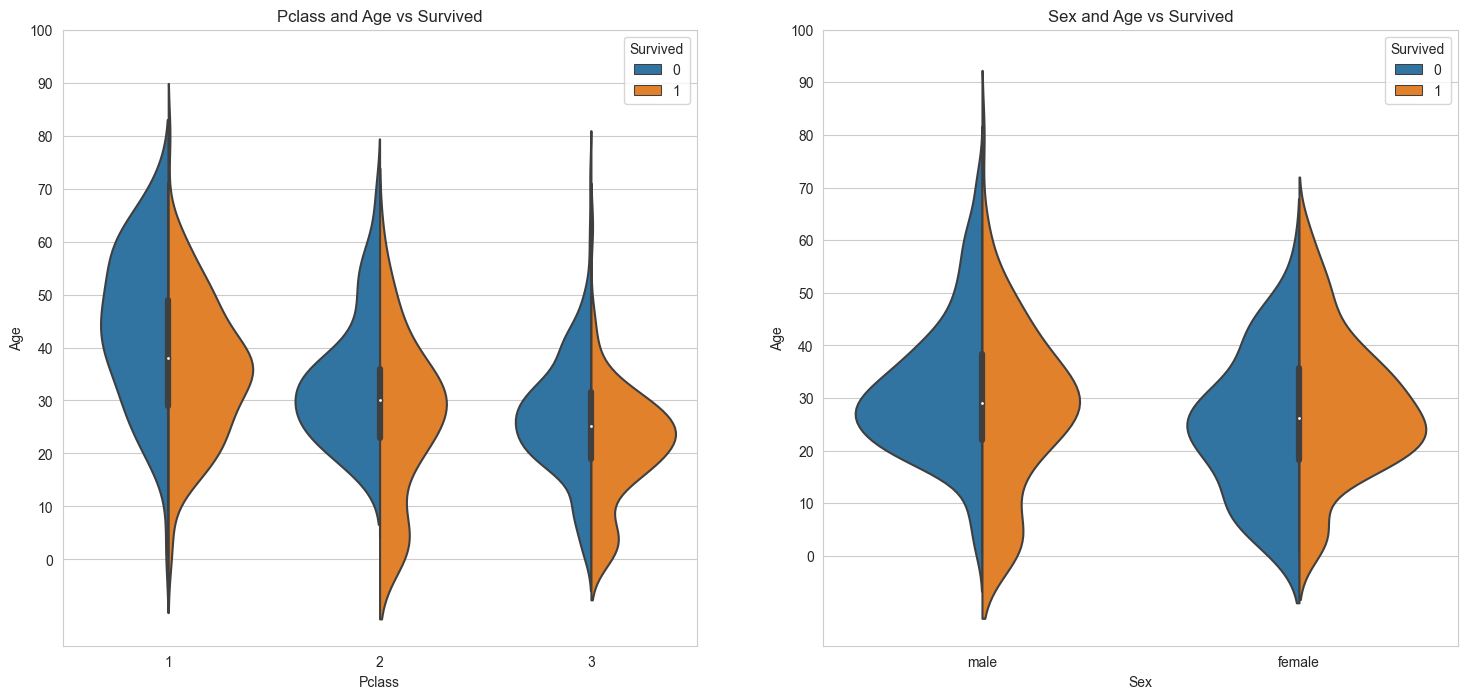

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

Analyse the distribution of the age.

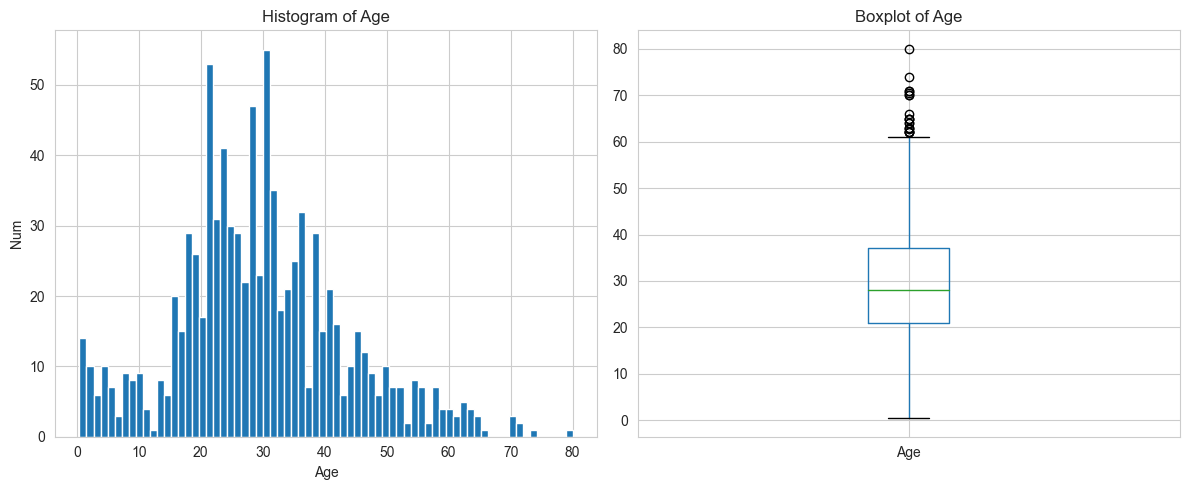

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(train_data['Age'], bins=70)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Num')
axes[0].set_title('Histogram of Age')

train_data.boxplot(column='Age', showfliers=True, ax=axes[1])
axes[1].set_title('Boxplot of Age')

plt.tight_layout()  
plt.show()

Here is a kernel density estimation curve and average survival ratio for different ages.

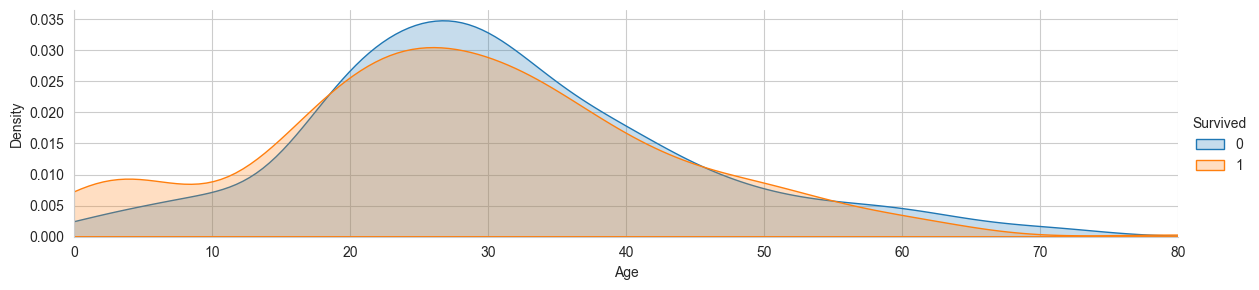

In [51]:
# kernel desity estimation
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot, 'Age', shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

plt.show()

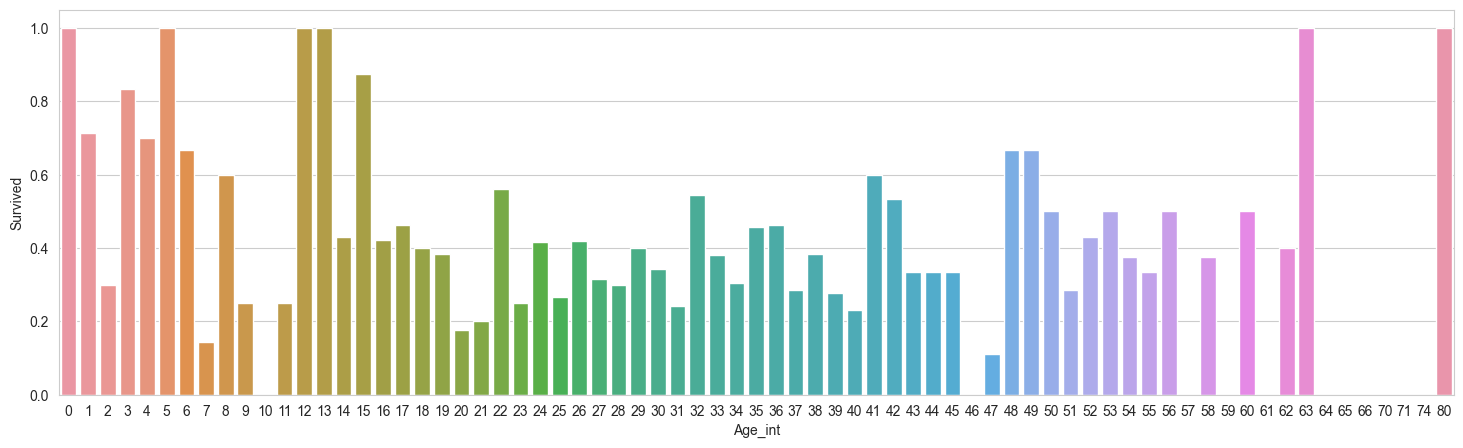

In [56]:
# average survival ratio for different ages
plt.figure(figsize=(18,5))
train_data['Age_int'] = train_data['Age'].astype(int)
avg_age = train_data[['Age_int', 'Survived']].groupby(['Age_int'], as_index=False).mean()
sns.barplot(x='Age_int', y='Survived', data=average_age)

plt.show()

Then we try to devide the passengers into 4 groups, and analyze the survival condition respectively.

In [58]:
bins = [0, 12, 18, 65, 100]
train_data['Age_group'] = pd.cut(train_data['Age'], bins)
by_age = train_data.groupby('Age_group')['Survived'].mean()
by_age

Age_group
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: Survived, dtype: float64

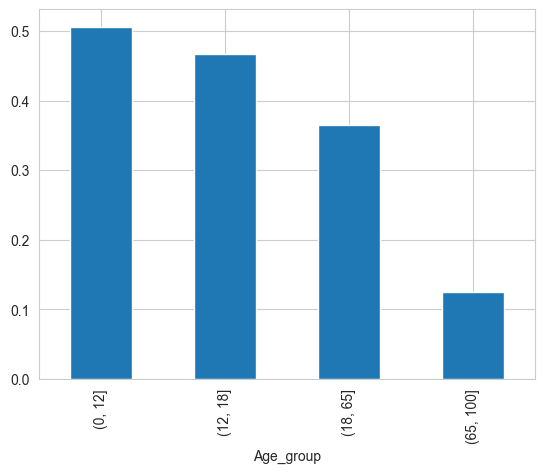

In [61]:
by_age.plot(kind='bar')

plt.show()

## (4) Title and Survival